In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
% pylab inline
import os
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [7]:
!pip install transformers

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [10]:
local_emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [ ]:
#df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')

In [ ]:
#df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel.csv')

In [ ]:
#df_audio_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete.csv')

In [ ]:
#df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
#df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
#df_text = pd.merge(df_text_train, df_text_test, on=['wav_file','label'])

In [ ]:
#audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [12]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [ ]:
#df_text_complete = pd.DataFrame()
#df_text_complete['wav_file'] = df_audio_complete['wav_file']
#df_text_complete['label'] = df_audio_complete['label']
#df_text_complete['transcription'] = [normalizeString(audiocode2text[code]) for code in df_audio_complete['wav_file']]

In [ ]:
#df_text_complete.head()

In [ ]:
#df_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_transcription_complete.csv', index=False)

In [ ]:
#df_audio_text_complete = pd.merge(df_audio_complete, df_text_complete, on=['wav_file','label'])

In [ ]:
#df_audio_text_complete.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#df_audio_text_complete.head()

In [ ]:
#df_audio_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv',index=False)

In [14]:
df_audio_text_complete_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_features_complete_init_end.csv')

In [15]:
df_audio_text_complete_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

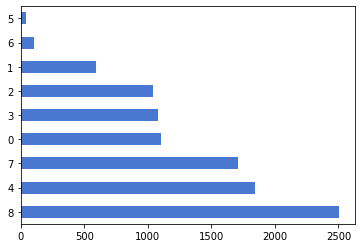

In [16]:
df_audio_text_complete_init_end['label'].value_counts().plot.barh()

In [18]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_subset = df_audio_text_complete_init_end[df_audio_text_complete_init_end['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_audio_text_subset.shape)
display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_subset['label'] = df_audio_text_subset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_audio_text_subset.head()

(7523, 527)


,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,7,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

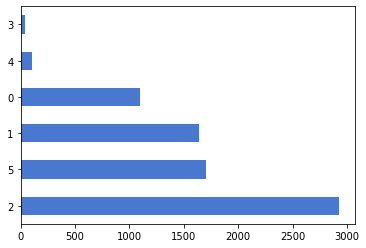

In [19]:
df_audio_text_subset['label'].value_counts().plot.barh()

In [21]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_fullset = df_audio_text_complete_init_end.copy()
# print(df_audio_text_subset.shape)
# display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_fullset['label'] = df_audio_text_fullset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6})
df_audio_text_fullset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,6,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

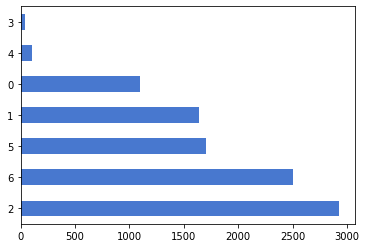

In [22]:
df_audio_text_fullset['label'].value_counts().plot.barh()

In [23]:
df_audio_text_subset.columns[2:-1]

Index(['sig_mean_1', 'sig_mean_2', 'sig_std_1', 'sig_std_2', 'rmse_mean_1',
       'rmse_mean_2', 'rmse_std_1', 'rmse_std_2', 'silence_1', 'silence_2',
       ...
       'Var_171', 'Var_172', 'Var_173', 'Var_174', 'Var_175', 'Var_176',
       'Var_177', 'Var_178', 'Var_179', 'Var_180'],
      dtype='object', length=524)

In [24]:
#scalar = StandardScaler()
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])
df_audio_text_subset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

In [25]:
X_audio_text=df_audio_text_subset.drop(columns=['wav_file','label'])
y_audio_text=df_audio_text_subset['label']

In [26]:
y_audio_text.head()

0    5
1    2
3    4
4    5
6    0
Name: label, dtype: int64

In [27]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys_new = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys_new)

In [28]:
X_train_val_split, X_test_split, y_train_val_split, y_test_split = train_test_split(X_audio_text,y_audio_text, test_size=0.20,random_state=100,stratify=y_audio_text)

In [29]:
X_train_val_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
166,0.022173,0.004353,0.037988,0.007073,0.027961,0.005602,0.025571,0.004297,0.455696,0.101266,-0.021776,-0.013766,1.077872,1.628260,0.036277,0.026709,-407.39163,176.14914,-34.832855,-0.462260,28.118359,-6.096693,1.242620,-5.351490,-16.302347,4.507911,10.749841,7.213766,7.986027,2.392474,1.912848,-1.318435,-8.213703,-4.506883,-2.913226,-2.224474,-515.12384,203.29352,-62.007610,31.090906,...,0.000078,0.000028,0.000010,4.628867e-06,1.047630e-06,1.170834e-07,1.709204e-09,4.901892e-11,3.394717e-11,3.041246e-11,2.748746e-11,2.485971e-11,2.257335e-11,2.051539e-11,1.864305e-11,1.697836e-11,1.547756e-11,1.411534e-11,1.289023e-11,1.178548e-11,1.078965e-11,9.899539e-12,9.086948e-12,8.370945e-12,7.723522e-12,7.140971e-12,6.625532e-12,6.162471e-12,5.751158e-12,5.385959e-12,5.065488e-12,4.783916e-12,4.538274e-12,4.329598e-12,4.152392e-12,4.008346e-12,3.893092e-12,3.811359e-12,3.761150e-12,presents ? it was only a trivial little brooch .
3051,0.012148,0.006247,0.018037,0.009387,0.015360,0.007954,0.009504,0.005020,0.088608,0.240506,0.001808,-0.005452,0.218021,0.246268,0.059706,0.073862,-447.20673,218.00348,-41.517270,16.987442,28.054703,-23.682432,12.581651,11.753182,-14.260317,-3.090917,-9.879278,-8.892808,2.631774,-7.881443,-6.780021,-2.307780,-5.701662,-0.405278,-6.303254,-8.115135,-525.86224,210.43008,-46.170700,12.554903,...,0.000025,0.000014,0.000005,1.612021e-06,3.516347e-07,3.030370e-08,1.106159e-09,1.628417e-10,1.396167e-10,1.270728e-10,1.153584e-10,1.039928e-10,9.370433e-11,8.426925e-11,7.566738e-11,6.804501e-11,6.123309e-11,5.512896e-11,4.972380e-11,4.492490e-11,4.066405e-11,3.690770e-11,3.353738e-11,3.060646e-11,2.798329e-11,2.565973e-11,2.362373e-11,2.182037e-11,2.023317e-11,1.884043e-11,1.762554e-11,1.656543e-11,1.564964e-11,1.487238e-11,1.421885e-11,1.368934e-11,1.326825e-11,1.296664e-11,1.278233e-11,oh yeah absolutely . you know and especially b...
28,0.002426,0.001478,0.003749,0.001869,0.003115,0.001848,0.002146,0.000288,0.000000,0.000000,-0.005043,-0.008122,0.009810,0.007638,0.001927,0.004233,-532.57590,215.78499,-76.297500,34.335170,30.068764,-29.737638,27.194527,5.306614,-13.043491,15.751520,-9.499388,-2.979486,15.054889,-5.029035,5.966687,6.987349,-8.333516,6.245324,2.672303,-6.697429,-637.91640,255.05031,-57.610012,35.446358,...,0.002978,0.001291,0.000330,1.099311e-04,1.379914e-05,8.292041e-06,7.133601e-07,1.558829e-08,2.390412e-11,1.524686e-11,1.130444e-11,8.531746e-12,6.572208e-12,5.142802e-12,4.083082e-12,3.290661e-12,2.686461e-12,2.216965e-12,1.848100e-12,1.559329e-12,1.326976e-12,1.138692e-12,9.844864e-13,8.616873e-13,7.574133e-13,6.692837e-13,5.980590e-13,5.382131e-13,4.891986e-13,4.437898e-13,4.113193e-13,3.784558e-13,3.514070e-13,3.297014e-13,3.137690e-13,2.982934e-13,2.882208e-13,2.800474e-13,2.746888e-13,okay . is that is that
6823,0.010351,0.010085,0.015035,0.016748,0.012909,0.013200,0.007607,0.010910,0.101266,0.278481,-0.010983,-0.005230,0.148140,0.195500,0.204876,0.219525,-499.15475,220.26312,-21.009844,-7.049796,20.483292,-11.696614,2.622640,1.912124,-20.617981,-12.801587,-9.048816,-5.847357,8.912958,1.765698,-6.815252,4.436724,7.166407,0.871645,0.777205,0.930147,-457.38810,207.70439,-55.214993,0.983842,...,0.000040,0.000010,0.000003,8.331350

In [30]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_val_split,y_train_val_split, test_size=0.20,random_state=100,stratify=y_train_val_split)

In [31]:
X_train_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
4549,0.004341,0.001924,0.009843,0.002734,0.005726,0.002458,0.008609,0.001218,0.291139,0.113924,-0.006224,-0.006409,0.083005,0.149686,0.004792,0.005202,-518.99994,155.01155,-38.593570,34.293774,23.478645,-16.653502,16.983316,-8.972191,-14.369136,14.658336,-8.049690,-7.475609,5.251380,-8.237527,2.155298,2.170537,-10.515731,1.798983,-0.428932,-8.446993,-613.17694,221.53409,-43.826650,21.604233,...,0.000165,6.813421e-05,4.739329e-05,1.684610e-05,2.799017e-06,9.094237e-08,2.324356e-08,1.878315e-08,1.621756e-08,1.407327e-08,1.232767e-08,1.082293e-08,9.562356e-09,8.473730e-09,7.525477e-09,6.712904e-09,6.005719e-09,5.383338e-09,4.840199e-09,4.363180e-09,3.943792e-09,3.575580e-09,3.247774e-09,2.963438e-09,2.708998e-09,2.484744e-09,2.288432e-09,2.114640e-09,1.961681e-09,1.827339e-09,1.710385e-09,1.608549e-09,1.520133e-09,1.445613e-09,1.382404e-09,1.331320e-09,1.290750e-09,1.261501e-09,1.243558e-09,i m sorry sir .
7921,0.003341,0.006856,0.005252,0.011049,0.004139,0.008506,0.003199,0.006984,0.303797,0.341772,0.002445,-0.007185,0.019428,0.031064,0.087441,0.130181,-583.00616,205.61124,-24.222937,30.058695,21.566492,-24.358627,15.352074,4.412619,-12.306042,11.406200,-0.191160,-1.769029,10.330853,-1.768542,2.754668,6.734168,-3.863809,2.828455,3.550475,-3.973151,-505.96390,182.24477,-37.201183,32.294620,...,0.000279,1.231265e-04,3.944791e-05,8.699324e-06,1.184124e-06,9.190524e-08,1.623266e-09,1.155122e-11,5.334261e-13,4.409489e-13,3.898820e-13,3.491105e-13,3.147307e-13,2.838422e-13,2.558925e-13,2.310831e-13,2.088652e-13,1.888241e-13,1.709396e-13,1.550266e-13,1.408012e-13,1.282139e-13,1.168660e-13,1.069682e-13,9.804981e-14,9.011584e-14,8.318266e-14,7.707305e-14,7.175116e-14,6.699471e-14,6.269527e-14,5.887679e-14,5.563321e-14,5.290526e-14,5.064568e-14,4.880756e-14,4.732986e-14,4.627127e-14,4.562551e-14,no so is everyone else in the long run . let s...
4173,0.001640,0.001890,0.005132,0.004121,0.002249,0.002389,0.004815,0.003454,0.746835,0.645570,-0.011703,-0.010813,0.024341,0.025169,0.014329,0.029004,-633.00220,166.16942,-11.435686,13.838784,28.075304,-5.075028,7.984867,9.577755,-4.213651,3.067632,-1.309718,-6.861309,2.092822,3.269555,2.685006,3.278825,-0.576126,0.362828,-0.674103,-4.585681,-631.69464,175.87383,-19.630537,23.984844,...,0.000044,2.918401e-05,1.052347e-05,1.090679e-06,1.212805e-07,1.064523e-08,6.220263e-10,4.073369e-11,2.400869e-11,1.949949e-11,1.617611e-11,1.355598e-11,1.150151e-11,9.833996e-12,8.460186e-12,7.333699e-12,6.393564e-12,5.598869e-12,4.928621e-12,4.358258e-12,3.870611e-12,3.454233e-12,3.091835e-12,2.783643e-12,2.514340e-12,2.281242e-12,2.079745e-12,1.903872e-12,1.751481e-12,1.619566e-12,1.505798e-12,1.407375e-12,1.323163e-12,1.252210e-12,1.192863e-12,1.145057e-12,1.107337e-12,1.080301e-12,1.063710e-12,and what about me ?
1776,0.001973,0.002618,0.002481,0.003373,0.002446,0.003260,0.000426,0.000853,0.000000,0.000000,-0.005602,-0.021917,0.003364,0.009772,0.006451,0.025208,-611.99220,246.13736,-50.325897,29.357311,31.918331,-22.457115,23.962032,7.010523,-10.857779,17.043339,-1.380079,-0.745597,15.504441,-0.041524,3.934133,4.584380,-5.862716,6.040644,4.022137,-4.626023,-586.51556,226.45157,-39.346810,24.417454,...,0.000001,4.922699e-07,1.844339e-07,7.203211e-

In [ ]:
# scalar = StandardScaler()
# X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
# X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
# X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
# #df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [ ]:
#X_train_split.head()

In [32]:
X_train_val_split_rf = X_train_val_split.copy()
X_test_split_rf = X_test_split.copy()

In [33]:
scalar = StandardScaler()
X_train_val_split_rf[X_train_val_split_rf.columns[:-1]] = scalar.fit_transform(X_train_val_split_rf[X_train_val_split_rf.columns[:-1]])
X_test_split_rf[X_test_split_rf.columns[:-1]] = scalar.fit_transform(X_test_split_rf[X_test_split_rf.columns[:-1]])

In [34]:
scalar = StandardScaler()
X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [ ]:
#X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(df_audio_text_subset,df_audio_text_subset['label'], test_size=0.20,random_state=100,stratify=df_audio_text_subset['label'])

In [241]:
df_audio_text_train_val_subset_rf = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
df_audio_text_train_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
df_audio_text_val_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
df_audio_text_test_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
df_audio_text_test_subset_rf = df_audio_text_test_subset.copy()


In [36]:
#X_train_session_based = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
X_train_session_based = df_audio_text_train_subset.drop(columns=['wav_file','label'])
y_train_session_based = df_audio_text_train_subset['label']
#X_train_session_based.drop(columns=['wav_file','label'],inplace=True)

In [37]:
X_test_session_based = df_audio_text_test_subset.drop(columns=['wav_file','label'])
y_test_session_based = df_audio_text_test_subset['label']
#X_test_session_based = X_test_subset.drop(columns=['wav_file','label'])
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
#y_test_session_based = y_test_subset.copy()
#X_test_session_based.drop(columns=['wav_file','label'],inplace=True)

In [38]:
X_val_session_based = df_audio_text_val_subset.drop(columns=['wav_file','label'])
y_val_session_based = df_audio_text_val_subset['label']
#X_val_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses05')]
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
#y_val_session_based = X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)
#X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)

In [39]:
X_train_val_session_based_rf = df_audio_text_train_val_subset_rf.drop(columns=['wav_file','label'])
y_train_val_session_based_rf = df_audio_text_train_val_subset_rf['label']

In [242]:
X_test_session_based_rf = df_audio_text_test_subset_rf.drop(columns=['wav_file','label'])
y_test_session_based_rf = df_audio_text_test_subset_rf['label']

In [40]:
print(X_train_session_based.shape,X_val_session_based.shape,X_test_session_based.shape)

(4339, 525) (1538, 525) (1646, 525)


In [41]:
scalar = StandardScaler()
X_train_session_based[X_train_session_based.columns[:-1]] = scalar.fit_transform(X_train_session_based[X_train_session_based.columns[:-1]])
X_val_session_based[X_val_session_based.columns[:-1]] = scalar.transform(X_val_session_based[X_val_session_based.columns[:-1]])
X_test_session_based[X_test_session_based.columns[:-1]] = scalar.fit_transform(X_test_session_based[X_test_session_based.columns[:-1]])

In [243]:
scalar = StandardScaler()
X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]] = scalar.fit_transform(X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]])
X_test_session_based_rf[X_test_session_based_rf.columns[:-1]] = scalar.fit_transform(X_test_session_based_rf[X_test_session_based_rf.columns[:-1]])

In [244]:
X_test_session_based_rf.shape

(1646, 525)

In [42]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(df_text.transcription).toarray()

# labels = df_text.label
# print(features.shape)

In [44]:
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

Test Set Accuracy =  0.444
Test Set F-score =  0.274
Test Set Precision =  0.310
Test Set Recall =  0.276
Confusion matrix, without normalization
[[109  16  88   0   0   7]
 [ 36  79 189   0   0  23]
 [ 67  26 397   0   0  96]
 [  1   0   6   0   0   1]
 [  3   0  18   0   0   1]
 [ 18  17 224   0   0  83]]


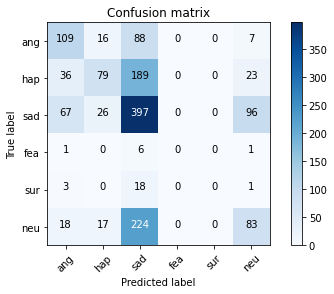

In [47]:
rf_classifier_split = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier_split.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# Predict
pred_probs = rf_classifier_split.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# Results
display_results(y_test_split, pred_probs)

Test Set Accuracy =  0.392
Test Set F-score =  0.186
Test Set Precision =  0.257
Test Set Recall =  0.253
Confusion matrix, without normalization
[[106   2  59   0   0   1]
 [ 82  34 326   0   0   0]
 [103  11 504   0   0   6]
 [  0   0  10   0   0   0]
 [  2   2  14   0   0   0]
 [ 22   9 351   0   0   2]]


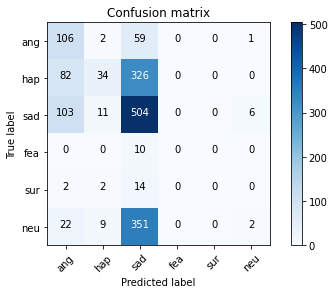

In [245]:
rf_classifier_session_based_rf = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier_session_based_rf.fit(X_train_val_session_based_rf.drop(columns=['transcription']), y_train_val_session_based_rf)

# Predict
pred_probs_sb_rf = rf_classifier_session_based_rf.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_probs_sb_rf)

In [246]:
import joblib
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_rf_session_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model_rf_0.392_'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.joblib'
joblib.dump(rf_classifier_session_based_rf,local_filename)

['/content/drive/My Drive/IEMOCAP/model_outputs/model_rf_session_init_end/model_rf_0.392_2021-10-2318_10_36.162898.joblib']

In [247]:
rf_test=joblib.load(local_filename)

Test Set Accuracy =  0.392
Test Set F-score =  0.186
Test Set Precision =  0.257
Test Set Recall =  0.253
Confusion matrix, without normalization
[[106   2  59   0   0   1]
 [ 82  34 326   0   0   0]
 [103  11 504   0   0   6]
 [  0   0  10   0   0   0]
 [  2   2  14   0   0   0]
 [ 22   9 351   0   0   2]]


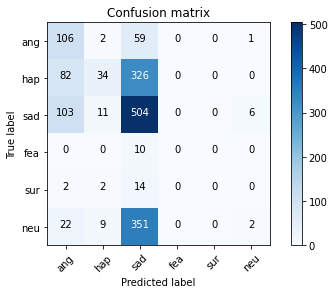

In [248]:
pred_rf_test = rf_test.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_rf_test)

In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [51]:
X_train_split_cnn = X_train_split.drop(columns=['transcription'])
X_val_split_cnn = X_val_split.drop(columns=['transcription'])
X_test_split_cnn = X_test_split.drop(columns=['transcription'])

In [52]:
X_val_split_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
8590,-0.561651,-0.193132,-0.595946,-0.226476,-0.571981,-0.209231,-0.597553,-0.234917,-1.133794,0.530650,-0.044275,-0.041009,-0.190857,-0.189475,-0.148548,-0.148637,-0.877442,0.541777,-0.603659,0.710451,0.007398,-0.475220,0.986305,-0.061659,-0.288874,1.370557,0.369564,0.173190,1.017123,-0.136182,0.502562,1.208232,0.286588,1.337378,1.209362,0.412380,-0.056633,-0.127927,1.889284,-0.970091,...,-0.134356,-0.125688,-0.116273,-0.091719,-0.070567,-0.060017,-0.058019,-0.057867,-0.069203,-0.074515,-0.074252,-0.074487,-0.074817,-0.075166,-0.075508,-0.075833,-0.076136,-0.076417,-0.076677,-0.076916,-0.077137,-0.077339,-0.077526,-0.077697,-0.077853,-0.077999,-0.078130,-0.078250,-0.078360,-0.078459,-0.078550,-0.078631,-0.078703,-0.078767,-0.078825,-0.078872,-0.078911,-0.078943,-0.078968,-0.078982
2223,-0.480825,-0.409587,-0.499368,-0.422715,-0.493484,-0.421845,-0.474250,-0.399471,1.032388,1.373796,-0.030944,-0.019049,-0.187787,-0.184218,-0.160640,-0.165628,-0.757117,0.418625,0.997761,-0.792901,-1.104349,0.341160,0.195777,0.906834,0.307621,-0.070591,0.702271,0.231667,0.254757,0.318133,-0.712855,0.516005,0.703687,-0.760080,-0.327607,-0.426461,-0.618300,0.189144,1.399617,-1.048835,...,-0.136449,-0.127446,-0.118322,-0.092710,-0.070846,-0.060092,-0.058033,-0.057868,-0.069206,-0.074539,-0.074280,-0.074516,-0.074848,-0.075200,-0.075543,-0.075868,-0.076172,-0.076454,-0.076714,-0.076954,-0.077175,-0.077377,-0.077564,-0.077735,-0.077892,-0.078038,-0.078169,-0.078290,-0.078400,-0.078499,-0.078590,-0.078670,-0.078743,-0.078807,-0.078865,-0.078912,-0.078951,-0.078983,-0.079008,-0.079022
7433,-0.560584,-0.338235,-0.577109,-0.277766,-0.569964,-0.334760,-0.544508,-0.169672,-1.133794,0.530650,-0.051006,-0.027854,-0.190343,-0.188578,-0.149824,-0.156868,-1.174495,-0.278321,1.297226,0.500542,0.317519,0.734486,-0.088393,0.533060,1.007249,0.596765,0.897802,-0.473688,-0.216026,0.918781,0.577021,0.900890,0.769270,0.245725,1.223271,0.955504,-0.091189,-0.915445,1.860851,-1.432188,...,-0.134951,-0.125267,-0.116514,-0.091596,-0.070510,-0.059978,-0.058022,-0.057866,-0.069206,-0.074538,-0.074276,-0.074511,-0.074842,-0.075192,-0.075534,-0.075859,-0.076162,-0.076443,-0.076703,-0.076942,-0.077163,-0.077365,-0.077552,-0.077722,-0.077879,-0.078024,-0.078156,-0.078276,-0.078386,-0.078485,-0.078576,-0.078656,-0.078729,-0.078793,-0.078850,-0.078897,-0.078937,-0.078969,-0.078993,-0.079008
5878,0.359046,0.211103,0.713016,0.783904,0.401140,0.252777,1.061311,1.414747,1.032388,2.476372,-0.015698,-0.056726,0.105652,0.107529,0.134818,0.167594,1.142259,-1.121974,-0.208879,-1.085942,1.207285,0.730433,-2.155639,-0.833948,1.184885,-1.251913,-1.050123,-0.779440,-0.703086,0.884761,-0.215590,-1.947904,-0.636882,-0.792138,-0.733879,0.466364,0.798629,-2.430094,0.851363,-1.346963,...,-0.115948,-0.110643,-0.103940,-0.085019,-0.065375,-0.057805,-0.057324,-0.054655,0.070991,0.816946,0.826233,0.837806,0.848587,0.858114,0.866434,0.873648,0.879895,0.885326,0.890106,0.894292,0.897945,0.901185,0.904071,0.906613,0.908833,0.910893,0.912674,0.914280,0.915687,0.916974,0.918084,0.919092,0.919929,0.920696,0.921368,0.921932,0.922383,0.922731,0.923047,0.923198
2777,-0.440977,-0.439775,-0.474956,-0.448921,-0.442708,-0.448382,-0.493033,-0.413769,0.519345

In [53]:
X_train_split_cnn = X_train_split_cnn.values.reshape(X_train_split_cnn.shape[0],X_train_split_cnn.shape[1],1)
X_val_split_cnn = X_val_split_cnn.values.reshape(X_val_split_cnn.shape[0],X_val_split_cnn.shape[1],1)
X_test_split_cnn = X_test_split_cnn.values.reshape(X_test_split_cnn.shape[0],X_test_split_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [54]:
model_1d_split = Sequential()
model_1d_split.add(Conv1D(254,5,padding='same',input_shape=(X_train_split_cnn[0].shape))) # there are 8 features
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Dropout(0.1))
model_1d_split.add(MaxPooling1D(pool_size=(8)))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Flatten())
model_1d_split.add(Dense(6))
model_1d_split.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [55]:
model_1d_split.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 524, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 524, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 65, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 65, 128)           0

In [56]:
def plot_history(history_model):
    # summarize history for accuracy
    plt.plot(history_model.history['sparse_categorical_accuracy'])
    plt.plot(history_model.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [57]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [58]:
from datetime import datetime

In [59]:
output_dir

'/content/drive/My Drive/IEMOCAP/model_outputs'

In [60]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_1d_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename,
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [61]:
model_1d_split.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [62]:
model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=32,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 18s 13ms/step - loss: 1.3717 - sparse_categorical_accuracy: 0.4233 - val_loss: 1.3655 - val_sparse_categorical_accuracy: 0.4369
Epoch 2/30
151/151 [==============================] - 1s 10ms/step - loss: 1.2549 - sparse_categorical_accuracy: 0.4767 - val_loss: 1.3019 - val_sparse_categorical_accuracy: 0.4593
Epoch 3/30
151/151 [==============================] - 2s 10ms/step - loss: 1.2020 - sparse_categorical_accuracy: 0.4985 - val_loss: 1.2679 - val_sparse_categorical_accuracy: 0.4850
Epoch 4/30
151/151 [==============================] - 1s 10ms/step - loss: 1.1506 - sparse_categorical_accuracy: 0.5291 - val_loss: 1.2971 - val_sparse_categorical_accuracy: 0.4809

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
151/151 [==============================] - 2s 10ms/step - loss: 1.0536 - sparse_categorical_accuracy: 0.5775 - val_loss: 1.2781 - val_sparse_categorical_accuracy: 0.4884

Epoch 00005

In [63]:
model_1d_split_hist.history

{'loss': [1.3716795444488525,
  1.2549450397491455,
  1.2019541263580322,
  1.1506216526031494,
  1.0535541772842407,
  1.025214672088623],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.4233485758304596,
  0.4767345190048218,
  0.49854591488838196,
  0.5290818214416504,
  0.5774823427200317,
  0.591192364692688],
 'val_loss': [1.3655086755752563,
  1.3019318580627441,
  1.2679065465927124,
  1.2971397638320923,
  1.2780966758728027,
  1.280714511871338],
 'val_sparse_categorical_accuracy': [0.4368770718574524,
  0.4593023359775543,
  0.485049843788147,
  0.4808970093727112,
  0.4883720874786377,
  0.4892026484012604]}

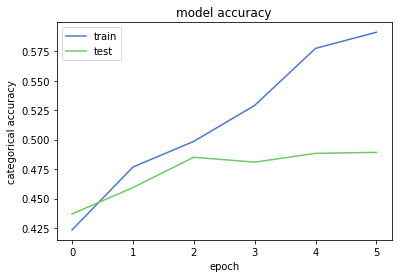

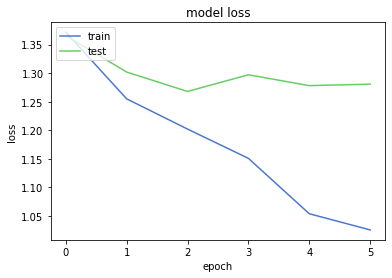

In [64]:
plot_history(model_1d_split_hist)

In [65]:
pred_y_split = model_1d_split.predict(X_test_split_cnn)

In [66]:
pred_y_split.shape

(1505, 6)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.500
Test Set F-score =  0.313
Test Set Precision =  0.337
Test Set Recall =  0.307
Confusion matrix, without normalization
[[ 87  23  96   0   0  14]
 [ 19 116 142   0   0  50]
 [ 50  32 423   0   0  81]
 [  1   2   4   0   0   1]
 [  3   1  12   0   0   6]
 [  8  36 172   0   0 126]]


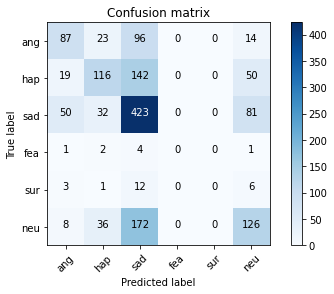

In [67]:
display_results(y_test_split, pred_y_split)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [68]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [69]:
from datetime import datetime

In [70]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_2d_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_') +'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [71]:
X_train_split_cnn_2d = np.expand_dims(X_train_split_cnn, -1)
X_val_split_cnn_2d = np.expand_dims(X_val_split_cnn, -1)
X_test_split_cnn_2d = np.expand_dims(X_test_split_cnn, -1)

In [72]:
X_train_split_cnn.shape

(4814, 524, 1)

In [73]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_split_2d = Sequential()
model_split_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_split_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_split_2d.add(Activation('relu'))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Activation('relu'))
model_split_2d.add(Flatten())
model_split_2d.add(Dense(6))
model_split_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [76]:
model_split_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=263,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
19/19 [==============================] - 7s 248ms/step - loss: 1.1334 - sparse_categorical_accuracy: 0.5305 - val_loss: 1.2681 - val_sparse_categorical_accuracy: 0.4809
Epoch 2/30
19/19 [==============================] - 4s 188ms/step - loss: 1.0552 - sparse_categorical_accuracy: 0.5671 - val_loss: 1.3005 - val_sparse_categorical_accuracy: 0.4867

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
19/19 [==============================] - 4s 187ms/step - loss: 0.9858 - sparse_categorical_accuracy: 0.5929 - val_loss: 1.3046 - val_sparse_categorical_accuracy: 0.4809

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
19/19 [==============================] - 4s 187ms/step - loss: 0.9679 - sparse_categorical_accuracy: 0.6003 - val_loss: 1.3066 - val_sparse_categorical_accuracy: 0.4884

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


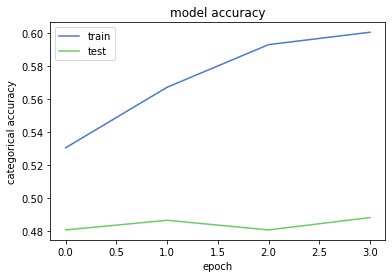

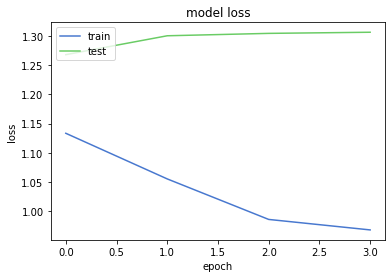

In [77]:
plot_history(model_history_split_2d)

In [78]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.502
Test Set F-score =  0.337
Test Set Precision =  0.498
Test Set Recall =  0.329
Confusion matrix, without normalization
[[107  26  76   0   0  11]
 [ 38 144 115   0   0  30]
 [ 59  57 386   0   0  84]
 [  0   2   5   0   0   1]
 [  3   4  10   0   1   4]
 [ 13  42 170   0   0 117]]


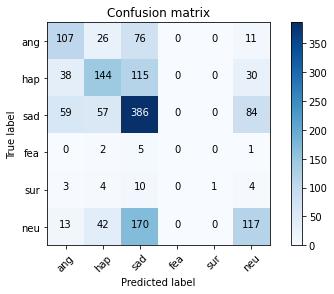

In [79]:
display_results(y_test_split, pred_y_2d_split)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig, RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_dbert_split = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_dbert_split_text = tokenize(X_train_split['transcription'], tokenizer_dbert_split)
X_test_dbert_split_text = tokenize(X_test_split['transcription'], tokenizer_dbert_split)
X_val_dbert_split_text = tokenize(X_val_split['transcription'], tokenizer_dbert_split)

100%|██████████| 1204/1204 [00:00<00:00, 2075.65it/s]


In [ ]:
config_db_split = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X_db_split = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(6, activation='softmax')(X_db_split)

model_dbert_split = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

for layer in model_dbert_split.layers[:3]:
    layer.trainable = False

model_dbert_split.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 114, 256)     918528      tf_distil_bert_model[0][13]  

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_dbert_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_split.shape

(1204,)

In [ ]:
model_dbert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_split = model_dbert_split.fit(X_train_dbert_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_dbert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 28s 138ms/step - loss: 1.1181 - sparse_categorical_accuracy: 0.5380 - val_loss: 1.1137 - val_sparse_categorical_accuracy: 0.5332
Epoch 2/30
151/151 [==============================] - 19s 125ms/step - loss: 1.0242 - sparse_categorical_accuracy: 0.5866 - val_loss: 1.0951 - val_sparse_categorical_accuracy: 0.5382
Epoch 3/30
151/151 [==============================] - 19s 125ms/step - loss: 0.9509 - sparse_categorical_accuracy: 0.6145 - val_loss: 1.0413 - val_sparse_categorical_accuracy: 0.5822
Epoch 4/30
151/151 [==============================] - 19s 125ms/step - loss: 0.8829 - sparse_categorical_accuracy: 0.6477 - val_loss: 1.0286 - val_sparse_categorical_accuracy: 0.5689
Epoch 5/30
151/151 [==============================] - 19s 125ms/step - loss: 0.8007 - sparse_categorical_accuracy: 0.6753 - val_loss: 1.0279 - val_sparse_categorical_accuracy: 0.5963

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

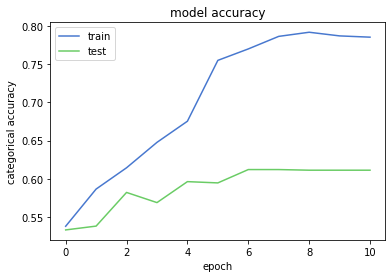

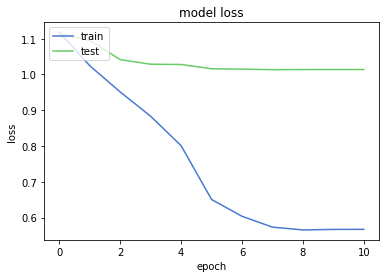

In [ ]:
plot_history(model_history_dbert_split)

In [ ]:
pred_y_dbert_split = model_dbert_split.predict(X_test_dbert_split_text)

Test Set Accuracy =  0.599
Test Set F-score =  0.438
Test Set Precision =  0.446
Test Set Recall =  0.442
Confusion matrix, without normalization
[[102   9  81   0  12  16]
 [  9 202  70   0   3  43]
 [ 41  36 421   0   3  85]
 [  0   3   3   0   0   2]
 [  2   5   4   0   8   3]
 [  8  41 116   0   9 168]]


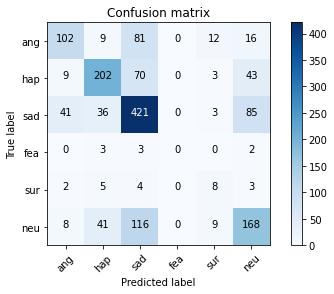

In [ ]:
display_results(y_test_split, pred_y_dbert_split)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import BertTokenizer, BertConfig, TFBertModel, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'bert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_bert_split = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_bert_split_text = tokenize(X_train_split['transcription'], tokenizer_bert_split)
X_test_bert_split_text = tokenize(X_test_split['transcription'], tokenizer_bert_split)
X_val_bert_split_text = tokenize(X_val_split['transcription'], tokenizer_bert_split)

100%|██████████| 1204/1204 [00:00<00:00, 2389.93it/s]


In [ ]:
config_bert_split = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split)

input_ids_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split = BERT_split(input_ids = input_ids_in_bert_split, attention_mask = input_masks_in_bert_split)[0]
X_bert_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split)
X_bert_split = tf.keras.layers.GlobalMaxPool1D()(X_bert_split)
X_bert_split = tf.keras.layers.Dense(64, activation='relu')(X_bert_split)
X_bert_split = tf.keras.layers.Dropout(0.2)(X_bert_split)
X_bert_split = tf.keras.layers.Dense(6, activation='softmax')(X_bert_split)

model_bert_split = tf.keras.Model(inputs=[input_ids_in_bert_split, input_masks_in_bert_split], outputs = X_bert_split)

for layer in model_bert_split.layers[:3]:
    layer.trainable = False

model_bert_split.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[0][25]       

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_bert_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_split.shape

(1204,)

In [ ]:
model_bert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_split = model_bert_split.fit(X_train_bert_split_text, 
                    y_train_split, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_bert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
151/151 [==============================] - 51s 251ms/step - loss: 1.2479 - sparse_categorical_accuracy: 0.4867 - val_loss: 1.1289 - val_sparse_categorical_accuracy: 0.5399
Epoch 2/25
151/151 [==============================] - 35s 229ms/step - loss: 1.1109 - sparse_categorical_accuracy: 0.5422 - val_loss: 1.0726 - val_sparse_categorical_accuracy: 0.5598
Epoch 3/25
151/151 [==============================] - 35s 229ms/step - loss: 1.0186 - sparse_categorical_accuracy: 0.5794 - val_loss: 1.0546 - val_sparse_categorical_accuracy: 0.5706
Epoch 4/25
151/151 [==============================] - 35s 229ms/step - loss: 0.9417 - sparse_categorical_accuracy: 0.6180 - val_loss: 0.9801 - val_sparse_categorical_accuracy: 0.6047
Epoch 5/25
151/151 [==============================] - 34s 229ms/step - loss: 0.8749 - sparse_categorical_accuracy: 0.6419 - val_loss: 1.0347 - val_sparse_categorical_accuracy: 0.6063

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

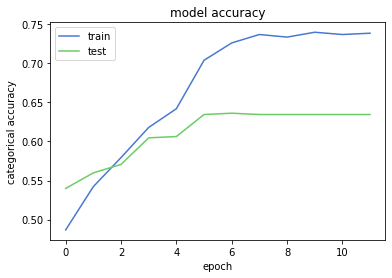

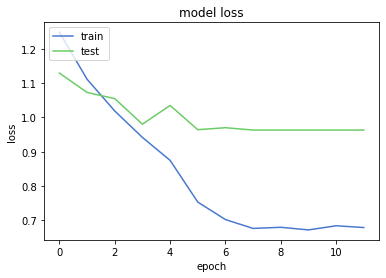

In [ ]:
plot_history(model_history_bert_split)

In [ ]:
pred_y_bert_split = model_bert_split.predict(X_test_bert_split_text)

Test Set Accuracy =  0.613
Test Set F-score =  0.448
Test Set Precision =  0.453
Test Set Recall =  0.447
Confusion matrix, without normalization
[[104  12  74   0   8  22]
 [  6 224  43   0   4  50]
 [ 43  35 417   0   2  89]
 [  0   4   2   0   0   2]
 [  3   7   3   0   7   2]
 [ 10  47 109   0   6 170]]


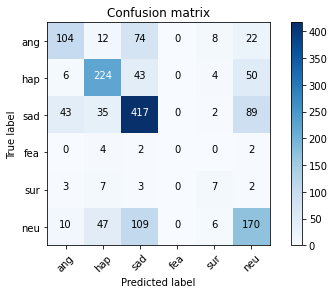

In [ ]:
display_results(y_test_split, pred_y_bert_split)

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

#Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_split = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'roberta-base'

In [ ]:
MAX_LENGTH = 119

tokenizer_roberta_split = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_roberta_split_text = tokenize(X_train_split['transcription'], tokenizer_roberta_split)
X_test_roberta_split_text = tokenize(X_test_split['transcription'], tokenizer_roberta_split)
X_val_roberta_split_text = tokenize(X_val_split['transcription'], tokenizer_roberta_split)

100%|██████████| 1204/1204 [00:00<00:00, 4324.64it/s]


In [ ]:
config_roberta_split = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_split = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_split)

input_ids_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_split = RoBERTa_split(input_ids = input_ids_in_roberta_split, attention_mask = input_masks_in_roberta_split)[0]
X_roberta_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_split)
X_roberta_split = tf.keras.layers.GlobalMaxPool1D()(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(64, activation='relu')(X_roberta_split)
X_roberta_split = tf.keras.layers.Dropout(0.2)(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_split)

model_roberta_split = tf.keras.Model(inputs=[input_ids_in_roberta_split, input_masks_in_roberta_split], outputs = X_roberta_split)

for layer in model_roberta_split.layers[:3]:
    layer.trainable = False

model_roberta_split.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model[0][25]    

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_roberta_split' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_split.shape

(1204,)

In [ ]:
model_roberta_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_split = model_roberta_split.fit(X_train_roberta_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 52s 253ms/step - loss: 1.3991 - sparse_categorical_accuracy: 0.4001 - val_loss: 1.3228 - val_sparse_categorical_accuracy: 0.4352
Epoch 2/30
151/151 [==============================] - 35s 234ms/step - loss: 1.2508 - sparse_categorical_accuracy: 0.4709 - val_loss: 1.1992 - val_sparse_categorical_accuracy: 0.5233
Epoch 3/30
151/151 [==============================] - 35s 234ms/step - loss: 1.1543 - sparse_categorical_accuracy: 0.5393 - val_loss: 1.1944 - val_sparse_categorical_accuracy: 0.5017

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
151/151 [==============================] - 35s 234ms/step - loss: 1.0492 - sparse_categorical_accuracy: 0.5719 - val_loss: 1.0938 - val_sparse_categorical_accuracy: 0.5606
Epoch 5/30
151/151 [==============================] - 35s 234ms/step - loss: 1.0141 - sparse_categorical_accuracy: 0.5987 - val_loss: 1.0876 - val_sparse_categorical_accuracy: 0.5656

Ep

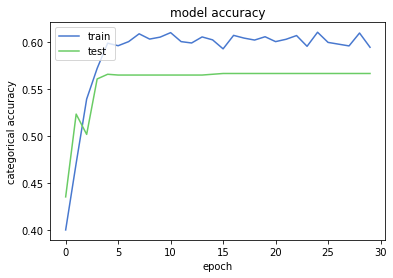

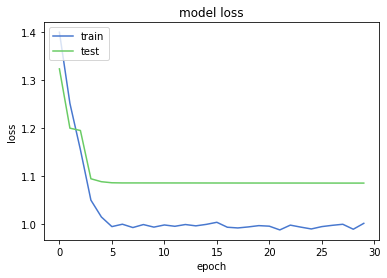

In [ ]:
plot_history(model_history_roberta_split)

In [ ]:
pred_y_roberta_split = model_roberta_split.predict(X_test_roberta_split_text)

Test Set Accuracy =  0.562
Test Set F-score =  0.355
Test Set Precision =  0.374
Test Set Recall =  0.352
Confusion matrix, without normalization
[[ 80  18 108   0   0  14]
 [ 12 214  67   0   0  34]
 [ 37  57 427   0   0  65]
 [  0   1   6   0   0   1]
 [  3   5   8   0   0   6]
 [ 10  53 154   0   0 125]]


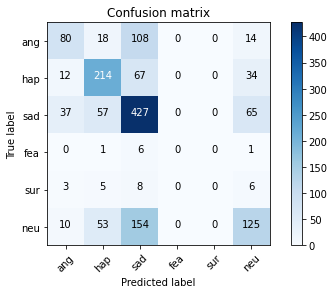

In [ ]:
display_results(y_test_split, pred_y_roberta_split)

In [ ]:
#Session based

In [80]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [81]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [82]:
X_train_session_based_cnn = X_train_session_based.drop(columns=['transcription'])
X_val_session_based_cnn = X_val_session_based.drop(columns=['transcription'])
X_test_session_based_cnn = X_test_session_based.drop(columns=['transcription'])

In [83]:
X_val_session_based_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
5764,-0.443977,-0.374089,-0.427991,-0.395804,-0.450072,-0.382339,-0.368465,-0.394210,0.982718,0.205792,-0.066811,-0.090911,-0.193037,-0.184974,-0.168200,-0.175409,-0.870153,-0.928516,1.806700,-0.217657,-0.184739,0.841264,-0.618481,1.111670,0.202382,-0.624058,2.213126,0.116084,-1.166894,1.389603,0.572954,1.617036,2.693890,0.207912,1.614851,2.372580,-0.447713,-0.060380,0.702186,-0.500231,...,-0.134584,-0.126314,-0.119409,-0.099397,-0.082448,-0.072643,-0.070919,-0.071098,-0.069570,-0.032218,-0.033313,-0.034093,-0.034682,-0.035152,-0.035541,-0.035870,-0.036154,-0.036403,-0.036622,-0.036817,-0.036991,-0.037148,-0.037289,-0.037417,-0.037532,-0.037637,-0.037732,-0.037819,-0.037897,-0.037968,-0.038031,-0.038088,-0.038139,-0.038184,-0.038222,-0.038255,-0.038283,-0.038305,-0.038321,-0.038330
5765,-0.126415,-0.158882,-0.115290,-0.197922,-0.133258,-0.163256,-0.066490,-0.236066,0.982718,0.140914,-0.014504,-0.038587,-0.163064,-0.142777,-0.156777,-0.159374,0.299395,-0.561965,0.924385,-1.071686,-1.478071,0.936147,-0.196363,-0.064753,1.422617,0.011297,0.087694,1.270195,0.471312,-0.309720,-0.428363,0.818896,0.871845,-0.550294,-0.026306,0.784973,0.205332,-0.376058,0.085707,0.414662,...,-0.130906,-0.119153,-0.106028,-0.091549,-0.081018,-0.072406,-0.070872,-0.071092,-0.069452,-0.031963,-0.033039,-0.033806,-0.034386,-0.034849,-0.035232,-0.035557,-0.035837,-0.036082,-0.036299,-0.036491,-0.036664,-0.036819,-0.036959,-0.037085,-0.037200,-0.037304,-0.037398,-0.037484,-0.037561,-0.037631,-0.037694,-0.037750,-0.037801,-0.037846,-0.037884,-0.037916,-0.037944,-0.037966,-0.037981,-0.037991
5766,-0.278988,0.731612,-0.355330,0.628158,-0.293263,0.765681,-0.452689,0.349764,-0.947051,-0.507861,-0.045951,-0.014682,-0.191064,-0.184129,-0.004451,-0.014452,-0.308956,0.363503,0.079173,0.672276,2.237842,0.429081,-0.126786,0.669021,-1.178793,-0.543082,0.598846,-1.082359,-0.142325,0.433991,-1.799467,-0.994004,0.036229,-1.166817,0.763662,1.304315,1.642716,0.091284,-0.485854,-2.747113,...,-0.127942,-0.119682,-0.115720,-0.096258,-0.079383,-0.072350,-0.070899,-0.071093,-0.069433,-0.031922,-0.032994,-0.033757,-0.034334,-0.034793,-0.035174,-0.035497,-0.035775,-0.036019,-0.036233,-0.036425,-0.036596,-0.036749,-0.036888,-0.037013,-0.037127,-0.037230,-0.037323,-0.037408,-0.037485,-0.037554,-0.037617,-0.037673,-0.037723,-0.037767,-0.037805,-0.037837,-0.037865,-0.037886,-0.037901,-0.037911
5767,0.006864,-0.153203,0.104417,-0.227928,-0.004136,-0.169692,0.246457,-0.341097,0.698928,-0.897126,-0.043983,-0.031630,-0.118429,-0.035650,-0.160599,-0.154162,0.315761,-2.227274,1.319189,-0.693215,-0.115021,1.812857,-0.811446,-0.181309,-0.304340,-1.106610,1.976316,0.052968,-2.680986,0.313105,-0.213011,-2.108318,-0.457121,-1.769777,-1.121588,1.132246,-0.052144,0.473437,1.086895,0.642241,...,-0.130914,-0.123238,-0.117960,-0.097413,-0.081345,-0.072310,-0.070900,-0.071098,-0.069574,-0.032223,-0.033316,-0.034094,-0.034681,-0.035148,-0.035536,-0.035863,-0.036146,-0.036392,-0.036610,-0.036804,-0.036977,-0.037132,-0.037273,-0.037399,-0.037514,-0.037618,-0.037712,-0.037798,-0.037875,-0.037946,-0.038009,-0.038065,-0.038116,-0.038160,-0.038198,-0.038231,-0.038258,-0.038280,-0.038296,-0.038305
5768,0.644946,0.304369,0.457287,0.208490,0.641891,0.3

In [84]:
X_train_session_based_cnn = X_train_session_based_cnn.values.reshape(X_train_session_based_cnn.shape[0],X_train_session_based_cnn.shape[1],1)
X_val_session_based_cnn = X_val_session_based_cnn.values.reshape(X_val_session_based_cnn.shape[0],X_val_session_based_cnn.shape[1],1)
X_test_session_based_cnn = X_test_session_based_cnn.values.reshape(X_test_session_based_cnn.shape[0],X_test_session_based_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [85]:
model_1d_session_based = Sequential()
model_1d_session_based.add(Conv1D(254,5,padding='same',input_shape=(X_train_session_based_cnn[0].shape))) # there are 8 features
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Dropout(0.1))
model_1d_session_based.add(MaxPooling1D(pool_size=(8)))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Flatten())
model_1d_session_based.add(Dense(6))
model_1d_session_based.add(Activation('softmax'))
opt_sb = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_1d_session_based.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 188, 254)          1524      
_________________________________________________________________
activation_10 (Activation)   (None, 188, 254)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 188, 128)          162688    
_________________________________________________________________
dropout_99 (Dropout)         (None, 188, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 23, 128)           82048     
_________________________________________________________________
activation_11 (Activation)   (None, 23, 128)          

In [86]:
# def plot_history(history_model):
#     # summarize history for accuracy
#     plt.plot(history_model.history['sparse_categorical_accuracy'])
#     plt.plot(history_model.history['val_sparse_categorical_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('categorical accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history_model.history['loss'])
#     plt.plot(history_model.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [88]:
from datetime import datetime

In [181]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_1d_session_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.00000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [90]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])

In [91]:
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=32,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 2s 12ms/step - loss: 1.3574 - sparse_categorical_accuracy: 0.4245 - val_loss: 1.7171 - val_sparse_categorical_accuracy: 0.4285
Epoch 2/30
136/136 [==============================] - 1s 10ms/step - loss: 1.2441 - sparse_categorical_accuracy: 0.4768 - val_loss: 1.3702 - val_sparse_categorical_accuracy: 0.4038
Epoch 3/30
136/136 [==============================] - 1s 10ms/step - loss: 1.1808 - sparse_categorical_accuracy: 0.5176 - val_loss: 1.3378 - val_sparse_categorical_accuracy: 0.4376
Epoch 4/30
136/136 [==============================] - 1s 10ms/step - loss: 1.1244 - sparse_categorical_accuracy: 0.5441 - val_loss: 1.4265 - val_sparse_categorical_accuracy: 0.4447

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
136/136 [==============================] - 1s 10ms/step - loss: 1.0144 - sparse_categorical_accuracy: 0.5891 - val_loss: 1.4656 - val_sparse_categorical_accuracy: 0.4415

Epoch 00005:

In [92]:
model_1d_session_based_hist.history

{'loss': [1.3574483394622803,
  1.2441211938858032,
  1.1807639598846436,
  1.1244122982025146,
  1.0144110918045044,
  0.9805783629417419],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.4245217740535736,
  0.47683799266815186,
  0.5176308155059814,
  0.5441346168518066,
  0.5890758037567139,
  0.6065914034843445],
 'val_loss': [1.7170573472976685,
  1.3702441453933716,
  1.3378392457962036,
  1.4265228509902954,
  1.4656468629837036,
  1.4587116241455078],
 'val_sparse_categorical_accuracy': [0.42847853899002075,
  0.40377113223075867,
  0.43758127093315125,
  0.4447334110736847,
  0.44148245453834534,
  0.44018206000328064]}

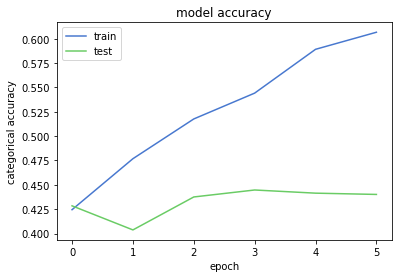

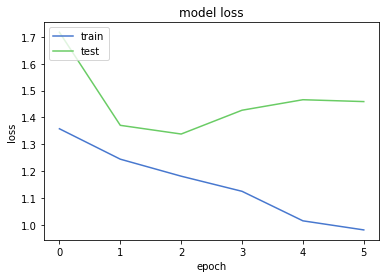

In [93]:
plot_history(model_1d_session_based_hist)

In [94]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [95]:
pred_y_session_based.shape

(1646, 6)

In [96]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [97]:
#pred_y_split.shape

In [98]:
#pred_y_split.shape

Test Set Accuracy =  0.466
Test Set F-score =  0.295
Test Set Precision =  0.301
Test Set Recall =  0.307
Confusion matrix, without normalization
[[ 85  20  45   0   0  18]
 [ 64 164 139   0   0  75]
 [100  44 386   0   0  94]
 [  0   2   7   0   0   1]
 [  2   4   9   0   0   3]
 [ 20  47 185   0   0 132]]


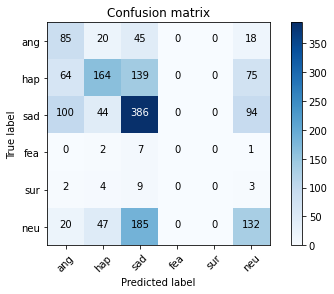

In [99]:
display_results(y_test_session_based, pred_y_session_based)

In [182]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=128,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
34/34 [==============================] - 2s 38ms/step - loss: 0.9790 - sparse_categorical_accuracy: 0.6077 - val_loss: 1.4585 - val_sparse_categorical_accuracy: 0.4402
Epoch 2/30
34/34 [==============================] - 1s 26ms/step - loss: 0.9779 - sparse_categorical_accuracy: 0.6119 - val_loss: 1.4583 - val_sparse_categorical_accuracy: 0.4402

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 3/30
34/34 [==============================] - 1s 26ms/step - loss: 0.9794 - sparse_categorical_accuracy: 0.6107 - val_loss: 1.4583 - val_sparse_categorical_accuracy: 0.4402

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 4/30
34/34 [==============================] - 1s 28ms/step - loss: 0.9765 - sparse_categorical_accuracy: 0.6098 - val_loss: 1.4583 - val_sparse_categorical_accuracy: 0.4402

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1e-08.
Epoch 5/30
34/34 [==============================] - 1s 2

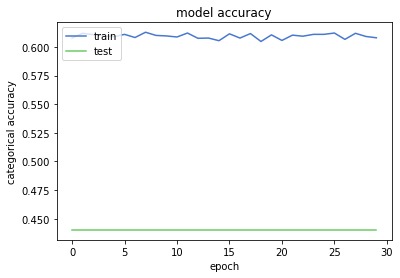

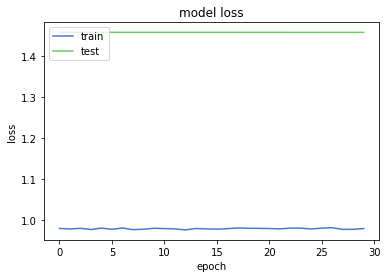

In [183]:
plot_history(model_1d_session_based_hist)

In [184]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

Test Set Accuracy =  0.466
Test Set F-score =  0.295
Test Set Precision =  0.301
Test Set Recall =  0.307
Confusion matrix, without normalization
[[ 85  20  45   0   0  18]
 [ 65 164 138   0   0  75]
 [100  44 386   0   0  94]
 [  0   2   7   0   0   1]
 [  2   4   9   0   0   3]
 [ 20  47 185   0   0 132]]


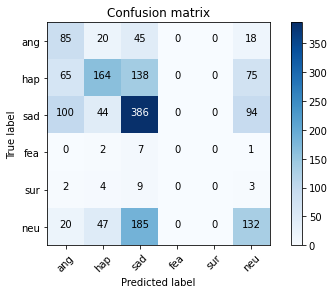

In [185]:
display_results(y_test_session_based, pred_y_session_based)

In [187]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=1024,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
5/5 [==============================] - 2s 238ms/step - loss: 0.9779 - sparse_categorical_accuracy: 0.6050 - val_loss: 1.4582 - val_sparse_categorical_accuracy: 0.4402
Epoch 2/30
5/5 [==============================] - 1s 143ms/step - loss: 0.9756 - sparse_categorical_accuracy: 0.6077 - val_loss: 1.4582 - val_sparse_categorical_accuracy: 0.4402
Epoch 3/30
5/5 [==============================] - 1s 144ms/step - loss: 0.9758 - sparse_categorical_accuracy: 0.6091 - val_loss: 1.4582 - val_sparse_categorical_accuracy: 0.4402
Epoch 4/30
5/5 [==============================] - 1s 144ms/step - loss: 0.9769 - sparse_categorical_accuracy: 0.6082 - val_loss: 1.4582 - val_sparse_categorical_accuracy: 0.4402
Epoch 5/30
5/5 [==============================] - 1s 144ms/step - loss: 0.9792 - sparse_categorical_accuracy: 0.6098 - val_loss: 1.4582 - val_sparse_categorical_accuracy: 0.4402
Epoch 6/30
5/5 [==============================] - 1s 145ms/step - loss: 0.9775 - sparse_categorical_accuracy: 

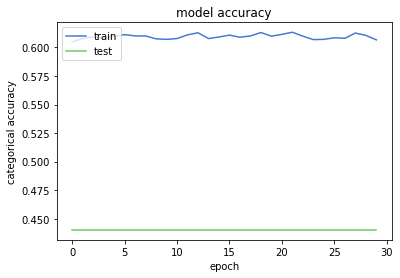

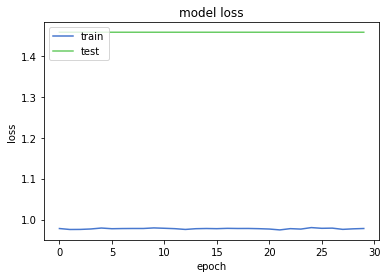

In [188]:
plot_history(model_1d_session_based_hist)

In [189]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

Test Set Accuracy =  0.466
Test Set F-score =  0.295
Test Set Precision =  0.301
Test Set Recall =  0.307
Confusion matrix, without normalization
[[ 85  20  45   0   0  18]
 [ 65 164 138   0   0  75]
 [100  44 386   0   0  94]
 [  0   2   7   0   0   1]
 [  2   4   9   0   0   3]
 [ 20  47 185   0   0 132]]


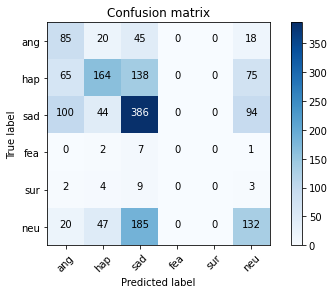

In [190]:
display_results(y_test_session_based, pred_y_session_based)

In [100]:
#from sklearn.metrics import balanced_accuracy_score

In [101]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [102]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [103]:
from datetime import datetime

In [176]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' +'model_init_2d_session_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [105]:
X_train_session_based_cnn_2d = np.expand_dims(X_train_session_based_cnn, -1)
X_val_session_based_cnn_2d = np.expand_dims(X_val_session_based_cnn, -1)
X_test_session_based_cnn_2d = np.expand_dims(X_test_session_based_cnn, -1)

In [106]:
X_train_session_based_cnn.shape

(4339, 524, 1)

In [107]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_session_based_2d = Sequential()
model_session_based_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_session_based_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Flatten())
model_session_based_2d.add(Dense(6))
model_session_based_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [108]:
model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
              y_train_session_based,
              epochs=30,
              batch_size=263,
              validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
17/17 [==============================] - 5s 295ms/step - loss: 1.4229 - sparse_categorical_accuracy: 0.4045 - val_loss: 1.3589 - val_sparse_categorical_accuracy: 0.3992
Epoch 2/30
17/17 [==============================] - 3s 196ms/step - loss: 1.2591 - sparse_categorical_accuracy: 0.4632 - val_loss: 1.3790 - val_sparse_categorical_accuracy: 0.3869

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
17/17 [==============================] - 3s 195ms/step - loss: 1.2111 - sparse_categorical_accuracy: 0.4948 - val_loss: 1.3142 - val_sparse_categorical_accuracy: 0.4304
Epoch 4/30
17/17 [==============================] - 3s 196ms/step - loss: 1.1887 - sparse_categorical_accuracy: 0.5015 - val_loss: 1.3328 - val_sparse_categorical_accuracy: 0.4129

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
17/17 [==============================] - 3s 196ms/step - loss: 1.1771 - sparse_categorical_accuracy: 0.50

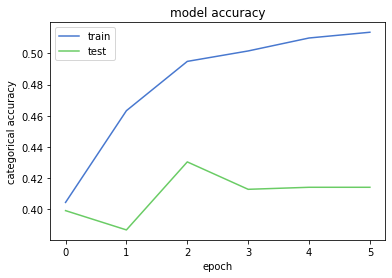

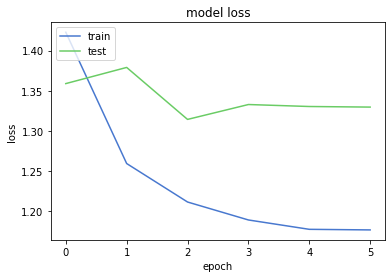

In [109]:
plot_history(model_history_session_based_2d)

In [110]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.452
Test Set F-score =  0.281
Test Set Precision =  0.305
Test Set Recall =  0.283
Confusion matrix, without normalization
[[ 66  22  63   0   0  17]
 [ 28 108 197   0   0 109]
 [ 52  38 421   0   0 113]
 [  0   1   8   0   0   1]
 [  1   4  11   0   0   2]
 [  7  20 208   0   0 149]]


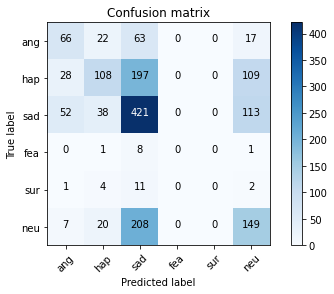

In [111]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [177]:
model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
              y_train_session_based,
              epochs=30,
              batch_size=128,
              validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
34/34 [==============================] - 5s 117ms/step - loss: 1.2299 - sparse_categorical_accuracy: 0.4902 - val_loss: 1.4344 - val_sparse_categorical_accuracy: 0.3940
Epoch 2/30
34/34 [==============================] - 3s 90ms/step - loss: 1.1237 - sparse_categorical_accuracy: 0.5375 - val_loss: 1.3573 - val_sparse_categorical_accuracy: 0.4343
Epoch 3/30
34/34 [==============================] - 3s 91ms/step - loss: 1.0638 - sparse_categorical_accuracy: 0.5670 - val_loss: 1.3933 - val_sparse_categorical_accuracy: 0.4116

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
34/34 [==============================] - 3s 90ms/step - loss: 0.9799 - sparse_categorical_accuracy: 0.6020 - val_loss: 1.4396 - val_sparse_categorical_accuracy: 0.4155

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
34/34 [==============================] - 3s 91ms/step - loss: 0.9503 - sparse_categorical_accuracy: 0.6135 -

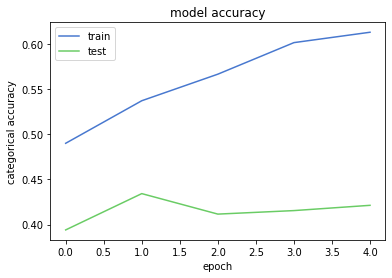

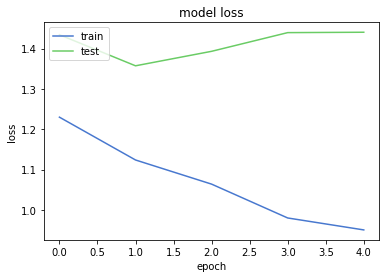

In [178]:
plot_history(model_history_session_based_2d)

In [179]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.451
Test Set F-score =  0.289
Test Set Precision =  0.293
Test Set Recall =  0.301
Confusion matrix, without normalization
[[ 86  22  43   0   0  17]
 [ 58 134 136   0   0 114]
 [ 73  67 368   0   0 116]
 [  0   2   5   0   0   3]
 [  1   4   9   0   0   4]
 [ 21  29 179   0   0 155]]


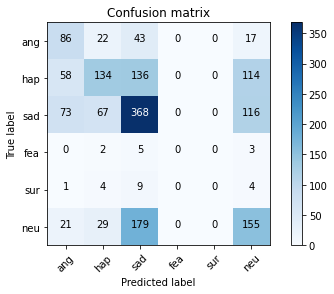

In [180]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [113]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [114]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [115]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [116]:
MODEL_NAME = 'distilbert-base-uncased'

In [118]:
MAX_LENGTH = 114

tokenizer_dbert_sb = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [119]:
X_train_dbert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_dbert_sb)
X_test_dbert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_dbert_sb)
X_val_dbert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_dbert_sb)

100%|██████████| 1538/1538 [00:00<00:00, 2338.08it/s]


In [120]:
config_dbert_sb = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb)

input_ids_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb = DistilBERT_sb(input_ids = input_ids_in_dbert_sb, attention_mask = input_masks_in_dbert_sb)[0]
X_dbert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb)
X_dbert_sb = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dropout(0.2)(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb)

model_dbert_session_based = tf.keras.Model(inputs=[input_ids_in_dbert_sb, input_masks_in_dbert_sb], outputs = X_dbert_sb)

for layer in model_dbert_session_based.layers[:3]:
    layer.trainable = False

model_dbert_session_based.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 114, 256)     918528      tf_distil_bert_model[0][13]  

In [166]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_dbert_sb_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [122]:
y_val_session_based.shape

(1538,)

In [123]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=512, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
9/9 [==============================] - 22s 2s/step - loss: 1.4642 - sparse_categorical_accuracy: 0.3517 - val_loss: 1.2864 - val_sparse_categorical_accuracy: 0.4467
Epoch 2/25
9/9 [==============================] - 12s 1s/step - loss: 1.2724 - sparse_categorical_accuracy: 0.4662 - val_loss: 1.2309 - val_sparse_categorical_accuracy: 0.4753
Epoch 3/25
9/9 [==============================] - 12s 1s/step - loss: 1.2046 - sparse_categorical_accuracy: 0.5059 - val_loss: 1.2075 - val_sparse_categorical_accuracy: 0.4844
Epoch 4/25
9/9 [==============================] - 12s 1s/step - loss: 1.1496 - sparse_categorical_accuracy: 0.5232 - val_loss: 1.1976 - val_sparse_categorical_accuracy: 0.4902

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
9/9 [==============================] - 12s 1s/step - loss: 1.1096 - sparse_categorical_accuracy: 0.5547 - val_loss: 1.1930 - val_sparse_categorical_accuracy: 0.4980
Epoch 6/25
9/9 [======================

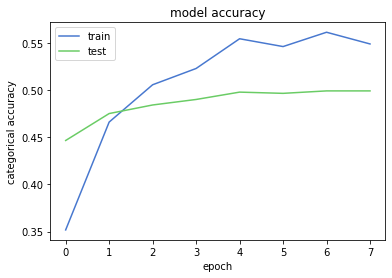

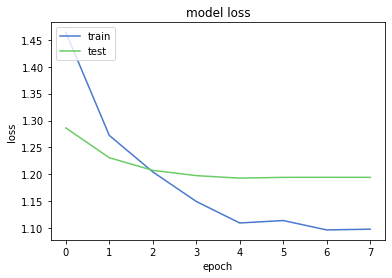

In [124]:
plot_history(model_history_dbert_session_based)

In [125]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.572
Test Set F-score =  0.359
Test Set Precision =  0.370
Test Set Recall =  0.354
Confusion matrix, without normalization
[[ 62  17  62   0   0  27]
 [  9 237 116   0   0  80]
 [ 43  51 450   0   0  80]
 [  0   3   5   0   0   2]
 [  3   3  10   0   0   2]
 [ 16  42 134   0   0 192]]


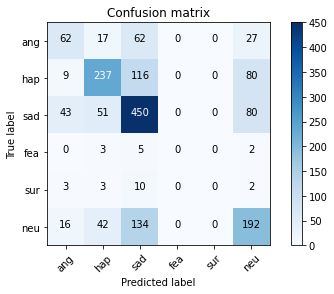

In [126]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [162]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=256, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
17/17 [==============================] - 22s 856ms/step - loss: 1.1667 - sparse_categorical_accuracy: 0.5167 - val_loss: 1.2200 - val_sparse_categorical_accuracy: 0.4733
Epoch 2/25
17/17 [==============================] - 12s 740ms/step - loss: 1.0840 - sparse_categorical_accuracy: 0.5575 - val_loss: 1.1615 - val_sparse_categorical_accuracy: 0.5182
Epoch 3/25
17/17 [==============================] - 12s 739ms/step - loss: 1.0306 - sparse_categorical_accuracy: 0.5769 - val_loss: 1.1445 - val_sparse_categorical_accuracy: 0.5286
Epoch 4/25
17/17 [==============================] - 12s 741ms/step - loss: 0.9834 - sparse_categorical_accuracy: 0.6018 - val_loss: 1.1893 - val_sparse_categorical_accuracy: 0.5026

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
17/17 [==============================] - 12s 740ms/step - loss: 0.9208 - sparse_categorical_accuracy: 0.6333 - val_loss: 1.1038 - val_sparse_categorical_accuracy: 0.5449
Epoch 6/25
17

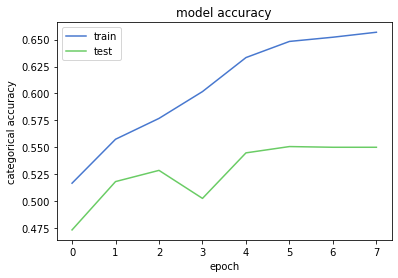

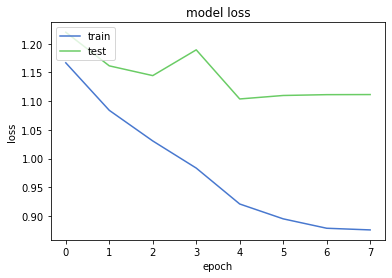

In [163]:
plot_history(model_history_dbert_session_based)

In [164]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.596
Test Set F-score =  0.382
Test Set Precision =  0.392
Test Set Recall =  0.380
Confusion matrix, without normalization
[[ 82   9  53   0   0  24]
 [ 11 253 114   0   0  64]
 [ 51  42 465   0   0  66]
 [  0   3   6   0   0   1]
 [  3   3  11   0   0   1]
 [ 17  36 150   0   0 181]]


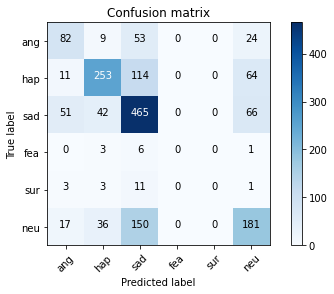

In [165]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [167]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=256, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
17/17 [==============================] - 23s 860ms/step - loss: 0.9432 - sparse_categorical_accuracy: 0.6167 - val_loss: 1.1069 - val_sparse_categorical_accuracy: 0.5436
Epoch 2/25
17/17 [==============================] - 12s 740ms/step - loss: 0.8807 - sparse_categorical_accuracy: 0.6531 - val_loss: 1.1152 - val_sparse_categorical_accuracy: 0.5514

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/25
17/17 [==============================] - 12s 741ms/step - loss: 0.8210 - sparse_categorical_accuracy: 0.6773 - val_loss: 1.1145 - val_sparse_categorical_accuracy: 0.5507

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/25
17/17 [==============================] - 12s 741ms/step - loss: 0.8014 - sparse_categorical_accuracy: 0.6912 - val_loss: 1.1073 - val_sparse_categorical_accuracy: 0.5514

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


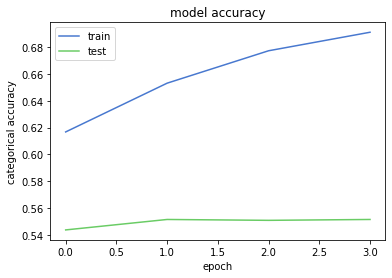

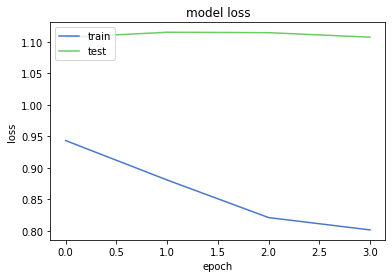

In [168]:
plot_history(model_history_dbert_session_based)

In [169]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.604
Test Set F-score =  0.384
Test Set Precision =  0.391
Test Set Recall =  0.383
Confusion matrix, without normalization
[[ 76  11  59   0   0  22]
 [ 13 261  88   0   0  80]
 [ 49  42 459   0   0  74]
 [  0   3   7   0   0   0]
 [  7   3   8   0   0   0]
 [ 16  37 132   0   0 199]]


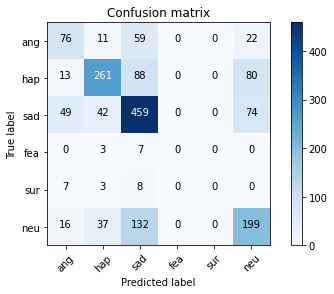

In [170]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [127]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [128]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [132]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [133]:
MODEL_NAME = 'bert-base-uncased'

In [134]:
MAX_LENGTH = 114

tokenizer_bert_sb = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [135]:
X_train_bert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_bert_sb)
X_test_bert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_bert_sb)
X_val_bert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_bert_sb)

100%|██████████| 1538/1538 [00:00<00:00, 2307.77it/s]


In [136]:
config_bert_sb = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb)

input_ids_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb = BERT_sb(input_ids = input_ids_in_bert_sb, attention_mask = input_masks_in_bert_sb)[0]
X_bert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb)
X_bert_sb = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb)
X_bert_sb = tf.keras.layers.Dropout(0.2)(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb)

model_bert_session_based = tf.keras.Model(inputs=[input_ids_in_bert_sb, input_masks_in_bert_sb], outputs = X_bert_sb)

for layer in model_bert_session_based.layers[:3]:
    layer.trainable = False

model_bert_session_based.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[0][25]       

In [171]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_bert_sb_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [138]:
y_val_session_based.shape

(1538,)

In [139]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=1024, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
5/5 [==============================] - 39s 6s/step - loss: 1.5205 - sparse_categorical_accuracy: 0.3411 - val_loss: 1.3679 - val_sparse_categorical_accuracy: 0.4181
Epoch 2/30
5/5 [==============================] - 23s 5s/step - loss: 1.3822 - sparse_categorical_accuracy: 0.3890 - val_loss: 1.2966 - val_sparse_categorical_accuracy: 0.4395
Epoch 3/30
5/5 [==============================] - 23s 5s/step - loss: 1.2967 - sparse_categorical_accuracy: 0.4462 - val_loss: 1.2444 - val_sparse_categorical_accuracy: 0.4577
Epoch 4/30
5/5 [==============================] - 23s 5s/step - loss: 1.2159 - sparse_categorical_accuracy: 0.4950 - val_loss: 1.1922 - val_sparse_categorical_accuracy: 0.4967
Epoch 5/30
5/5 [==============================] - 23s 5s/step - loss: 1.1746 - sparse_categorical_accuracy: 0.5213 - val_loss: 1.2143 - val_sparse_categorical_accuracy: 0.4740

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/30
5/5 [======================

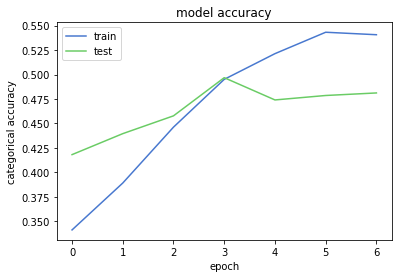

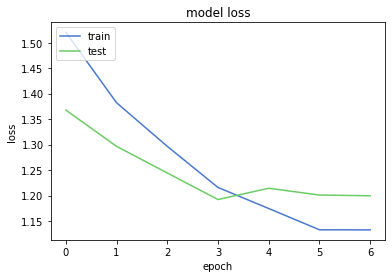

In [140]:
plot_history(model_history_bert_session_based)

In [158]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=256, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
17/17 [==============================] - 41s 2s/step - loss: 1.1358 - sparse_categorical_accuracy: 0.5409 - val_loss: 1.1590 - val_sparse_categorical_accuracy: 0.5137
Epoch 2/30
17/17 [==============================] - 24s 1s/step - loss: 1.0557 - sparse_categorical_accuracy: 0.5706 - val_loss: 1.1296 - val_sparse_categorical_accuracy: 0.5247
Epoch 3/30
17/17 [==============================] - 24s 1s/step - loss: 0.9966 - sparse_categorical_accuracy: 0.6089 - val_loss: 1.1028 - val_sparse_categorical_accuracy: 0.5403
Epoch 4/30
17/17 [==============================] - 24s 1s/step - loss: 0.9314 - sparse_categorical_accuracy: 0.6322 - val_loss: 1.1186 - val_sparse_categorical_accuracy: 0.5468

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
17/17 [==============================] - 24s 1s/step - loss: 0.8737 - sparse_categorical_accuracy: 0.6587 - val_loss: 1.0764 - val_sparse_categorical_accuracy: 0.5650
Epoch 6/30
17/17 [==========

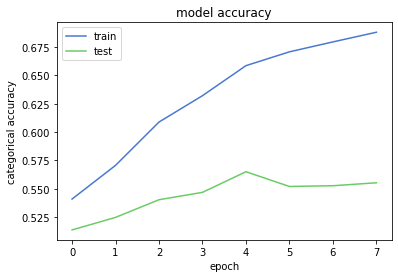

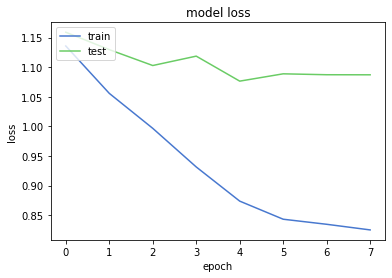

In [159]:
plot_history(model_history_bert_session_based)

In [160]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.609
Test Set F-score =  0.429
Test Set Precision =  0.454
Test Set Recall =  0.420
Confusion matrix, without normalization
[[ 84   8  54   0   0  22]
 [ 16 247  94   0   3  82]
 [ 50  29 444   0   1 100]
 [  1   3   6   0   0   0]
 [  5   3   6   0   3   1]
 [ 19  33 106   0   2 224]]


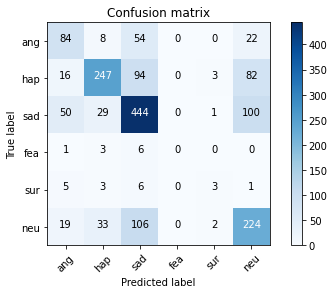

In [161]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [141]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.566
Test Set F-score =  0.351
Test Set Precision =  0.365
Test Set Recall =  0.347
Confusion matrix, without normalization
[[ 54  17  67   0   0  30]
 [ 17 228 118   0   0  79]
 [ 37  49 445   0   0  93]
 [  1   2   6   0   0   1]
 [  5   2  11   0   0   0]
 [ 14  30 135   0   0 205]]


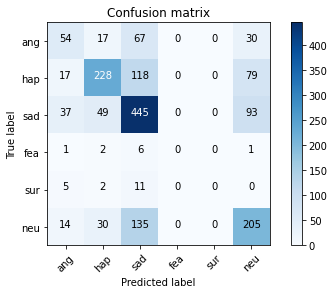

In [142]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [172]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=256, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
17/17 [==============================] - 40s 2s/step - loss: 0.8999 - sparse_categorical_accuracy: 0.6398 - val_loss: 1.0832 - val_sparse_categorical_accuracy: 0.5481
Epoch 2/30
17/17 [==============================] - 24s 1s/step - loss: 0.8311 - sparse_categorical_accuracy: 0.6723 - val_loss: 1.0728 - val_sparse_categorical_accuracy: 0.5826
Epoch 3/30
17/17 [==============================] - 24s 1s/step - loss: 0.7675 - sparse_categorical_accuracy: 0.7082 - val_loss: 1.1953 - val_sparse_categorical_accuracy: 0.5442

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
17/17 [==============================] - 24s 1s/step - loss: 0.7057 - sparse_categorical_accuracy: 0.7287 - val_loss: 1.0683 - val_sparse_categorical_accuracy: 0.5741

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
17/17 [==============================] - 24s 1s/step - loss: 0.6812 - sparse_categorical_accuracy: 0.7442 - val_l

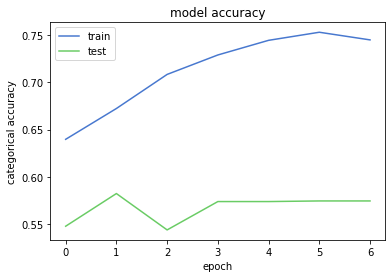

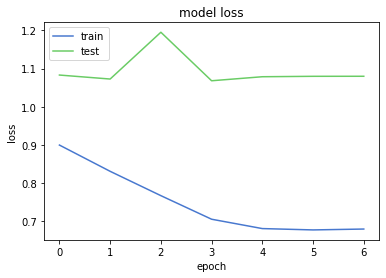

In [173]:
plot_history(model_history_bert_session_based)

In [174]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.621
Test Set F-score =  0.467
Test Set Precision =  0.473
Test Set Recall =  0.467
Confusion matrix, without normalization
[[ 91   8  51   0   0  18]
 [ 15 259  84   0   6  78]
 [ 51  28 447   0   2  96]
 [  1   2   7   0   0   0]
 [  5   3   2   0   7   1]
 [ 14  35 114   0   3 218]]


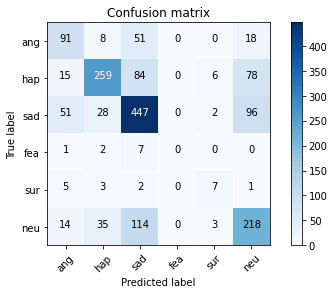

In [175]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [143]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_session_based = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [144]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [145]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig

In [146]:
MODEL_NAME = 'roberta-base'

In [147]:
MAX_LENGTH = 119

tokenizer_robert_sb = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [148]:
X_train_roberta_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_roberta_sb)
X_test_roberta_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_roberta_sb)
X_val_roberta_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_roberta_sb)

100%|██████████| 1538/1538 [00:00<00:00, 4537.19it/s]


In [149]:
config_roberta_sb = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_sb = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_sb)

input_ids_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_sb = RoBERTa_sb(input_ids = input_ids_in_roberta_sb, attention_mask = input_masks_in_roberta_sb)[0]
X_roberta_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_sb)
X_roberta_sb = tf.keras.layers.GlobalMaxPool1D()(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(64, activation='relu')(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dropout(0.2)(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_sb)

model_roberta_session_based = tf.keras.Model(inputs=[input_ids_in_roberta_sb, input_masks_in_roberta_sb], outputs = X_roberta_sb)

for layer in model_roberta_session_based.layers[:3]:
    layer.trainable = False

model_roberta_session_based.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model[0][25]    

In [150]:
curr_dt_time = datetime.now()
local_filename = output_dir + '/' + 'model_init_roberta_sb_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [151]:
y_val_session_based.shape

(1538,)

In [152]:
model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=1024, 
                    validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
5/5 [==============================] - 41s 6s/step - loss: 1.7816 - sparse_categorical_accuracy: 0.2348 - val_loss: 1.4795 - val_sparse_categorical_accuracy: 0.4057
Epoch 2/30
5/5 [==============================] - 24s 5s/step - loss: 1.4464 - sparse_categorical_accuracy: 0.3674 - val_loss: 1.4139 - val_sparse_categorical_accuracy: 0.4057
Epoch 3/30
5/5 [==============================] - 24s 5s/step - loss: 1.4308 - sparse_categorical_accuracy: 0.3625 - val_loss: 1.3880 - val_sparse_categorical_accuracy: 0.4057
Epoch 4/30
5/5 [==============================] - 24s 5s/step - loss: 1.3996 - sparse_categorical_accuracy: 0.3796 - val_loss: 1.3783 - val_sparse_categorical_accuracy: 0.4116

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
5/5 [==============================] - 24s 5s/step - loss: 1.3850 - sparse_categorical_accuracy: 0.3803 - val_loss: 1.3743 - val_sparse_categorical_accuracy: 0.4148
Epoch 6/30
5/5 [======================

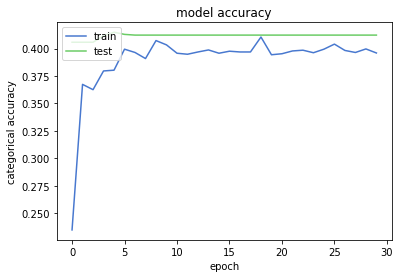

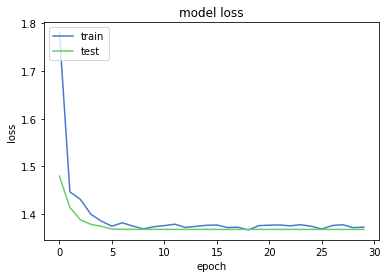

In [153]:
plot_history(model_history_roberta_session_based)

In [154]:
model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=256, 
                    validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
17/17 [==============================] - 42s 2s/step - loss: 1.3568 - sparse_categorical_accuracy: 0.4162 - val_loss: 1.3078 - val_sparse_categorical_accuracy: 0.4356
Epoch 2/30
17/17 [==============================] - 25s 1s/step - loss: 1.2593 - sparse_categorical_accuracy: 0.4637 - val_loss: 1.2508 - val_sparse_categorical_accuracy: 0.4610
Epoch 3/30
17/17 [==============================] - 25s 1s/step - loss: 1.1943 - sparse_categorical_accuracy: 0.5082 - val_loss: 1.2102 - val_sparse_categorical_accuracy: 0.4876
Epoch 4/30
17/17 [==============================] - 25s 1s/step - loss: 1.1309 - sparse_categorical_accuracy: 0.5501 - val_loss: 1.2045 - val_sparse_categorical_accuracy: 0.4785

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/30
17/17 [==============================] - 25s 1s/step - loss: 1.1050 - sparse_categorical_accuracy: 0.5568 - val_loss: 1.1779 - val_sparse_categorical_accuracy: 0.4837
Epoch 6/30
17/17 [==========

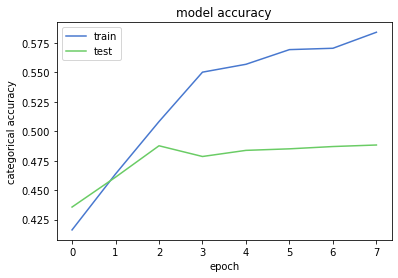

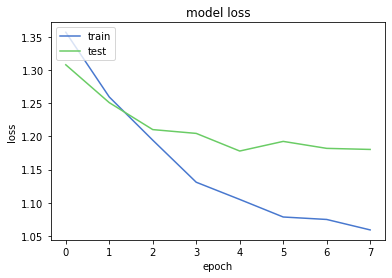

In [157]:
plot_history(model_history_roberta_session_based)

In [155]:
pred_y_roberta_session_based = model_roberta_session_based.predict(X_test_roberta_session_based_text)

Test Set Accuracy =  0.563
Test Set F-score =  0.356
Test Set Precision =  0.366
Test Set Recall =  0.352
Confusion matrix, without normalization
[[ 63  22  64   0   0  19]
 [ 13 245 117   0   0  67]
 [ 48  59 426   0   0  91]
 [  0   4   3   0   0   3]
 [  3   2  13   0   0   0]
 [ 10  35 147   0   0 192]]


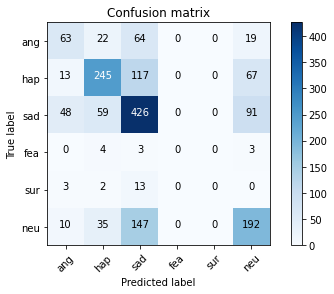

In [156]:
display_results(y_test_session_based,pred_y_roberta_session_based)

In [ ]:
### Ensemble

In [196]:
from sklearn.ensemble import VotingClassifier
import joblib

In [249]:
model_1d_name = output_dir+'/model_init_1d_session_init_end/'+'model-00004-0.54413-1.12441-0.44473-1.426522021-10-2315_14_46.093026.h5'
model_2d_name = output_dir +'/model_init_2d_session_init_end/' + 'model-00002-0.53745-1.12375-0.43433-1.357342021-10-2316_26_39.984024.h5'
model_rf_name = output_dir + '/model_rf_session_init_end/' + 'model_rf_0.392_2021-10-2318_10_36.162898' + '.joblib'

In [250]:
model_1d_ens = keras.models.load_model(model_1d_name)
model_2d_ens = keras.models.load_model(model_2d_name)
model_rf_ens = joblib.load(model_rf_name)

In [251]:
y_ens_1d_pred = model_1d_ens.predict(X_test_session_based_cnn)

In [252]:
y_ens_2d_pred = model_2d_ens.predict(X_test_session_based_cnn_2d)

In [253]:
y_ens_rf_pred = model_rf_ens.predict_proba(X_test_session_based_rf.drop(columns='transcription'))

In [254]:
y_ens_rf_pred.shape

(1646, 6)

In [211]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [212]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb_ens.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [213]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [214]:
MODEL_NAME = 'distilbert-base-uncased'

In [215]:
MAX_LENGTH = 114

tokenizer_dbert_sb_ens = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [216]:
config_dbert_sb_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb_ens)

input_ids_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb_ens = DistilBERT_sb_ens(input_ids = input_ids_in_dbert_sb_ens, attention_mask = input_masks_in_dbert_sb_ens)[0]
X_dbert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dropout(0.2)(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb_ens)

model_dbert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_dbert_sb_ens, input_masks_in_dbert_sb_ens], outputs = X_dbert_sb_ens)

#for layer in model_dbert_session_based.layers[:3]:
#    layer.trainable = False

model_dbert_session_based_ens.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_2 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_2[0][1

In [217]:
model_dbert_session_based_ens.load_weights(output_dir+'/model_init_dbert_sb_init_end/'+'model-00002-0.65315-0.88066-0.55137-1.115182021-10-2316_16_02.040413.h5')

In [219]:
y_ens_dbert_session_based_pred = model_dbert_session_based_ens.predict(X_test_dbert_session_based_text)

In [220]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [221]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb_ens.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [222]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [223]:
MODEL_NAME = 'bert-base-uncased'

In [224]:
MAX_LENGTH = 114

tokenizer_bert_sb_ens = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [225]:
config_bert_sb_ens = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb_ens = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb_ens)

input_ids_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb_ens = BERT_sb(input_ids = input_ids_in_bert_sb_ens, attention_mask = input_masks_in_bert_sb_ens)[0]
X_bert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dropout(0.2)(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb_ens)

model_bert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_bert_sb_ens, input_masks_in_bert_sb_ens], outputs = X_bert_sb_ens)

#for layer in model_bert_session_based.layers[:3]:
#    layer.trainable = False

model_bert_session_based_ens.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[1][25]       

In [227]:
model_bert_session_based_ens.load_weights(output_dir+'/model_init_bert_sb_init_end/model-00007-0.57041-1.07485-0.48700-1.181942021-10-2315_36_45.578013'+'.h5')

ValueError: ignored

In [233]:
y_ens_1d_pred.shape

(1646, 6)

In [255]:
y_ens_all_pred = array([y_ens_rf_pred, y_ens_1d_pred,y_ens_2d_pred,y_ens_dbert_session_based_pred])

In [259]:
y_ens_summed_pred = tensordot(y_ens_all_pred, [1,1,3,6], axes=((0),(0)))

In [260]:
y_ens_summed_pred.shape

(1646, 6)

In [ ]:
display_results(y_test_session_based,y_ens_summed_pred)

Test Set Accuracy =  0.610
Test Set F-score =  0.394
Test Set Precision =  0.416
Test Set Recall =  0.386
Confusion matrix, without normalization
[[ 85  11  61   0   0  11]
 [ 13 259 119   0   0  51]
 [ 35  46 492   0   0  51]
 [  0   3   6   0   0   1]
 [  2   4  11   0   0   1]
 [  6  31 179   0   0 168]]


In [ ]:
model_combined_split_db_1 = VotingClassifier(estimators=[('m1ds', model_1d_ens), ('m2ds', model_2d_ens)], voting='soft')

In [ ]:
model_combined_split_db_1.predict_proba(X_train_split)